In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy
from scipy import stats

In [29]:
cosine_similarity_per_seed = np.load('result/cosine_similarity_per_seed.npy')
ava_score_per_seed = np.load('result/ava_score_per_seed.npy')
vendi_score = np.load('result/vendi_score.npy')
cosine_similarity_per_seed_aba = np.load('result/cosine_similarity_per_seed_aba.npy')
ava_score_per_seed_aba = np.load('result/ava_score_per_seed_aba.npy')
vendi_score_aba = np.load('result/vendi_score_aba.npy')
cosine_similarity_per_seed_mask = np.load('result/cosine_similarity_per_seed_mask.npy')
ava_score_per_seed_mask = np.load('result/ava_score_per_seed_mask.npy')
vendi_score_mask = np.load('result/vendi_score_mask.npy')

/tmp/ipykernel_2605266/1146921031.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y='Value', data=data, palette='pastel',  ax=ax)
/tmp/ipykernel_2605266/1146921031.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y='Value', data=data, palette='pastel',  ax=ax)
/tmp/ipykernel_2605266/1146921031.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Group', y='Value', data=data, palette='pastel',  ax=ax)


0      0.474347
1      0.463489
2      0.455019
3      0.488400
4      0.466270
         ...   
195    0.520355
196    0.567117
197    0.510894
198    0.455734
199    0.607744
Name: Value, Length: 200, dtype: float32
Group1 vs Group2: t-statistic = -10.441198330355837, p-value = 1.247725408786711e-20
Group1 vs Group3: t-statistic = -3.5437602754168345, p-value = 0.0004915373891588895
Group2 vs Group3: t-statistic = 9.474486283270307, p-value = 8.176814634748435e-18
0     -0.252678
1      1.654291
2     -5.075441
3      2.638820
4     -2.414366
         ...   
195    1.756782
196   -1.310582
197   -2.315156
198    1.284854
199    6.559975
Name: Value, Length: 200, dtype: float32
Group1 vs Group2: t-statistic = -1.8528381388470292, p-value = 0.06538626225318872
Group1 vs Group3: t-statistic = 1.5165730201268148, p-value = 0.13096142174655945
Group2 vs Group3: t-statistic = 3.441562236898421, p-value = 0.0007048079030173584
0     2.149328
1     2.904817
2     2.834433
3     2.304484
4    

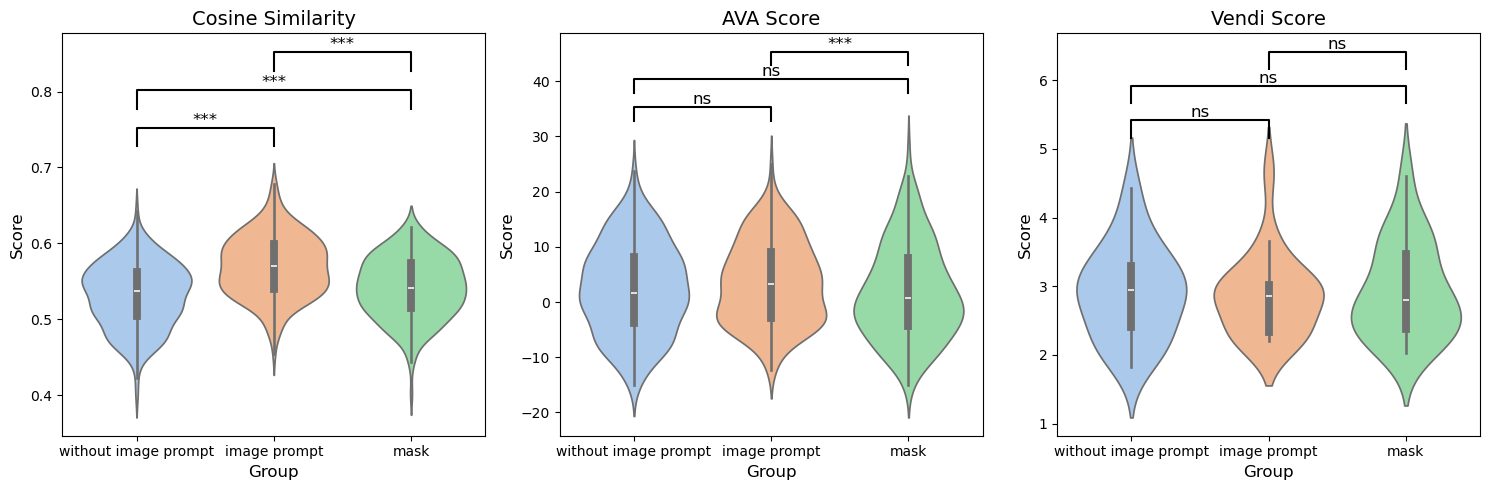

In [52]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

# 生成示例数据
np.random.seed(42)
group1 = np.random.normal(0, 1, 100)  # 整体1的数据
group2 = np.random.normal(2, 1.5, 100)  # 整体2的数据
group3 = np.random.normal(-1, 0.8, 100)  # 整体3的数据

# 将数据整理为 DataFrame 格式
import pandas as pd

# 定义显著性水平标注函数
def annotate_significance(ax, p_value, x1, x2, y, line_height=0.01):
    """
    在图上标注显著性水平。
    :param ax: 子图对象
    :param p_value: p 值
    :param x1: 第一组的 x 位置
    :param x2: 第二组的 x 位置
    :param y: 标注的 y 位置
    :param line_height: 线段的高度
    """
    # 绘制横向线段
    ax.plot([x1, x1, x2, x2], [y, y + line_height, y + line_height, y], lw=1.5, color='black')
    
    # 标注显著性水平
    if p_value < 0.001:
        sig = '***'
    elif p_value < 0.01:
        sig = '**'
    elif p_value < 0.05:
        sig = '*'
    else:
        sig = 'ns'  # 不显著
    ax.text((x1 + x2) / 2, y + line_height, sig, ha='center', va='bottom', fontsize=12)

def draw(ax, data, title,interval):
    sns.violinplot(x='Group', y='Value', data=data, palette='pastel',  ax=ax)
    # 计算最大 y 值
    y_max = data['Value'].max()
    group1 = data[data['Group'] == 'without image prompt']['Value']
    group2 = data[data['Group'] == 'image prompt']['Value']
    group3 = data[data['Group'] == 'mask']['Value']
    print(group1)

    # Group1 vs Group2
    t_stat, p_value = ttest_rel(group1, group2)
    print(f"Group1 vs Group2: t-statistic = {t_stat}, p-value = {p_value}")
    annotate_significance(ax, p_value, 0, 1, y_max + interval,line_height=interval / 2)

    # Group1 vs Group3
    t_stat, p_value = ttest_rel(group1, group3)
    print(f"Group1 vs Group3: t-statistic = {t_stat}, p-value = {p_value}")
    annotate_significance(ax, p_value, 0, 2, y_max + interval * 2,line_height=interval / 2)

    # Group2 vs Group3
    t_stat, p_value = ttest_rel(group2, group3)
    print(f"Group2 vs Group3: t-statistic = {t_stat}, p-value = {p_value}")
    annotate_significance(ax, p_value, 1, 2, y_max + interval * 3,line_height=interval / 2)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Group', fontsize=12)
    ax.set_ylabel('Score', fontsize=12)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))




data = pd.DataFrame({
    'Value': np.concatenate([cosine_similarity_per_seed_aba, cosine_similarity_per_seed, cosine_similarity_per_seed_mask]),
    'Group': ['without image prompt'] * len(cosine_similarity_per_seed_aba) + ['image prompt'] * len(cosine_similarity_per_seed) + ['mask'] * len(cosine_similarity_per_seed_mask)
})

draw(axes[0],data,'Cosine Similarity',0.05)

data = pd.DataFrame({
    'Value': np.concatenate([ava_score_per_seed_aba, ava_score_per_seed, ava_score_per_seed_mask]),
    'Group': ['without image prompt'] * len(cosine_similarity_per_seed_aba) + ['image prompt'] * len(cosine_similarity_per_seed) + ['mask'] * len(cosine_similarity_per_seed_mask)
})

draw(axes[1],data,'AVA Score',5)
data = pd.DataFrame({
    'Value': np.concatenate([vendi_score_aba, vendi_score, vendi_score_mask]),
    'Group': ['without image prompt'] * len(vendi_score_aba) + ['image prompt'] * len(vendi_score) + ['mask'] * len(vendi_score_mask)
})

draw(axes[2],data,'Vendi Score',0.5)
# 调整布局
plt.tight_layout()
# 显示图形
plt.show()